In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from statsmodels.tsa.api import ExponentialSmoothing, ARIMA, AutoReg


C:\Users\bensk\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


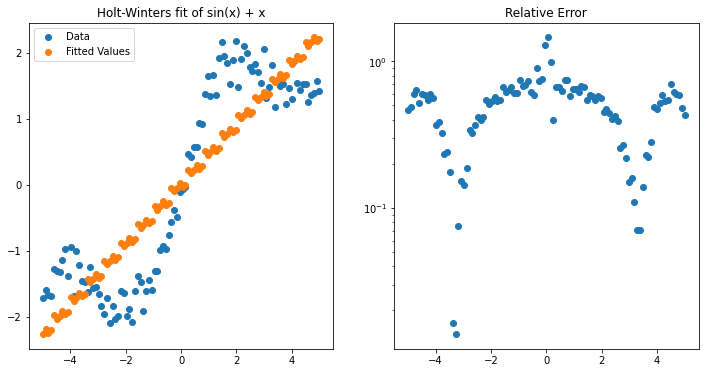

In [15]:
def generate_data(X, f, noise):
    return [f(x) + np.random.normal(loc=0, scale=noise) for x in X]

def plot_error(ax, X, Y, fitted_values):
    ax.scatter(X, np.abs((Y-fitted_values)/Y))
    ax.set_yscale("log")

def generate_graphs(fit, model_name, f_name, f, X, Y):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].set_title(model_name + " fit of " + f_name)
    axes[0].scatter(X, Y, label="Data")
    axes[0].scatter(X, fit, label="Fitted Values")
    axes[0].legend()
    
    axes[1].set_title("Relative Error")
    plot_error(axes[1], X, f(X), fit)
    

X = np.linspace(-5, 5, 100)
f = lambda x: np.sin(x) + x/2
Y = generate_data(X, f, 0.2)

generate_graphs(AutoReg(Y, lags=0, trend="ct", seasonal=True, period=6).fit().fittedvalues, "Holt-Winters", "sin(x) + x", f, X, Y)